In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
raw_data=pd.read_csv(r"C:\Users\HP\Downloads\EDA Customer\archive\Hackathon_working_Data.csv")

In [3]:
df=raw_data.copy()

In [4]:
df.shape

(26985, 14)

In [5]:
df.describe(include='all')

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
count,26985,26985,26985.000000,26985,26985.000000,26985.000000,26985.000000,26985.000000,26985,26985,26985,26985,26985,26985
unique,3,10,NaN,6424,NaN,NaN,NaN,NaN,80,174,232,354,643,1315
top,M3,N7,NaN,T1521,NaN,NaN,NaN,NaN,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,BRITANNIA INDS,MARIE GOLD,MARIE GOLD REGULAR
freq,9430,5625,NaN,44,NaN,NaN,NaN,NaN,6677,1954,1954,3147,977,786
mean,NaN,NaN,15.167019,NaN,278.754206,4.105021,67.808551,52.812982,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,8.956057,NaN,541.398504,95.666947,118.005978,84.987730,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,0.000000,0.500000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,7.000000,NaN,40.000000,1.000000,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,14.000000,NaN,111.000000,1.000000,30.000000,22.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,23.000000,NaN,280.000000,2.000000,80.000000,64.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [7]:
#Numerical Columns: DAY, BILL_AMT, QTY, VALUE, PRICE (int or float).
#Categorical/Text Columns: MONTH, STORECODE, BILL_ID, GRP, SGRP, etc. (object).

In [8]:
df.head(5)

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [9]:
#just to know what is relation between BILL_AMT	QTY	VALUE	PRICE	
filtered=df[df['BILL_ID']=='T375']

In [10]:
filtered[filtered['BILL_AMT']==420]

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
2806,M1,N2,5,T375,420.0,1.0,70.0,70.0,COFFEE,INSTANT COFFEE,INSTANT COFFEE,NESTLE INDIA,NESCAFE,NESCAFE CLASSIC
2807,M1,N2,5,T375,420.0,1.0,100.0,100.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GIRNAR FOOD & BEVER,GIRNAR,GIRNAR
2808,M1,N2,5,T375,420.0,1.0,200.0,200.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,TATA GLOBAL BEVERAGES LTD,TATA TETLEY,TATA TETLEY
2809,M1,N2,5,T375,420.0,2.0,50.0,25.0,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,BRITANNIA INDS,NUTRICHOICE,NUTRICHOICE OATS COOKIES


**Observation** There are many same BILL_ID's that are generated from many different stores For example: BILL_ID : T375 is used in store 1,2,3,4,5 and 6. Hence, create a column which contains unique Bill_Id (helpful for sales per store analysis)

## 1. Understanding the data

In [13]:
#new column using STORECODE	BILL_ID
df['UNIQUE_BILL_ID']=df['STORECODE']+df['BILL_ID']

#inserting new column on desired location
df.insert(2, 'UNIQUE_BILL_ID', df.pop('UNIQUE_BILL_ID'))

In [14]:
df.head(2)

,MONTH,STORECODE,UNIQUE_BILL_ID,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,N1T375,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,N1T379,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY


In [15]:
sales_revenue=df.groupby('UNIQUE_BILL_ID')['VALUE'].sum().reset_index()
sales_revenue.head()
sales_revenue[sales_revenue['VALUE']==420]

,UNIQUE_BILL_ID,VALUE
309,N10T2869,420.0
442,N10T3228,420.0
3613,N1T9183,420.0
4062,N2T375,420.0
7403,N5T2853,420.0
8619,N6T1179,420.0
8850,N6T1571,420.0


# 2. Preparing Data for EDA


1. Missing Values

In [18]:
df.isnull().sum()

MONTH             0
STORECODE         0
UNIQUE_BILL_ID    0
DAY               0
BILL_ID           0
BILL_AMT          0
QTY               0
VALUE             0
PRICE             0
GRP               0
SGRP              0
SSGRP             0
CMP               0
MBRD              0
BRD               0
dtype: int64

2.Duplicate Records

In [20]:
#dr=df[df.duplicated(keep='last')]
df.duplicated().sum()

90

In [21]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

3.Data Encoding

In [30]:
df.dtypes

MONTH              object
STORECODE          object
UNIQUE_BILL_ID     object
DAY                 int64
BILL_ID            object
BILL_AMT          float64
QTY               float64
VALUE             float64
PRICE             float64
GRP                object
SGRP               object
SSGRP              object
CMP                object
MBRD               object
BRD                object
dtype: object

There are 2 categorial columns (STORECODE,MONTH). Enocding these columns is a crucial step in preparing data for machine learning models, as most models require numerical input

In [41]:
#month column
def remove_str(column):
    return column.str.replace('M','')
df['MONTH']=remove_str(df['MONTH'])
df['MONTH']=df['MONTH'].astype(int)

In [44]:
#STORECODE
encoder=LabelEncoder()
df['STORECODE']=encoder.fit_transform(df['STORECODE'])+1

In [46]:
df.STORECODE.value_counts()

STORECODE
8     5602
1     4563
6     4420
5     3210
2     2154
4     1785
10    1526
3     1327
7     1181
9     1127
Name: count, dtype: int64

4.Numerical Variables

In [59]:
numerical_cols=[x for x in df.columns if df[x].dtypes!='O' ]
print('Number of numerical columns:',len(numerical_cols))
df[numerical_cols].sample(1)

Number of numerical columns: 7


,MONTH,STORECODE,DAY,BILL_AMT,QTY,VALUE,PRICE
19371,3,5,23,246.5,1.0,27.0,27.0


5.Categorical Variables

In [69]:

categorical_cols=[x for x in df.columns if df[x].dtypes=='O' ]
print('Number of numerical columns:',len(categorical_cols))
df[categorical_cols].sample(1)

Number of numerical columns: 8


,UNIQUE_BILL_ID,BILL_ID,GRP,SGRP,SSGRP,CMP,MBRD,BRD
3865,N4T76,T76,CHOCOLATE,MOULDED,MOULDED,MONDELEZ INTERNATIONAL,CADBURY DAIRY MILK,DAIRY MILK


6.Distribuiton of Numerical values

Distribution of continuous numerical features in your dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_14324\2869128461.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[x],shade=True,label=x)
C:\Users\HP\AppData\Local\Temp\ipykernel_14324\2869128461.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[x],shade=True,label=x)
C:\Users\HP\AppData\Local\Temp\ipykernel_14324\2869128461.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[x],shade=True,label=x)


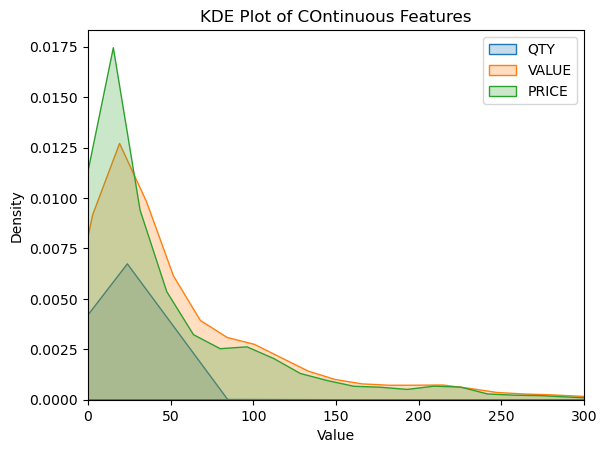

In [81]:
continuous_feautures=['QTY','VALUE','PRICE']
for x in continuous_feautures:
    sns.kdeplot(df[x],shade=True,label=x)
plt.title('KDE Plot of COntinuous Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0,300)
plt.legend()
plt.show()

In [ ]:
a. Overall Sales by Month

In [ ]:
MONTH M2 produced Highest Revenue

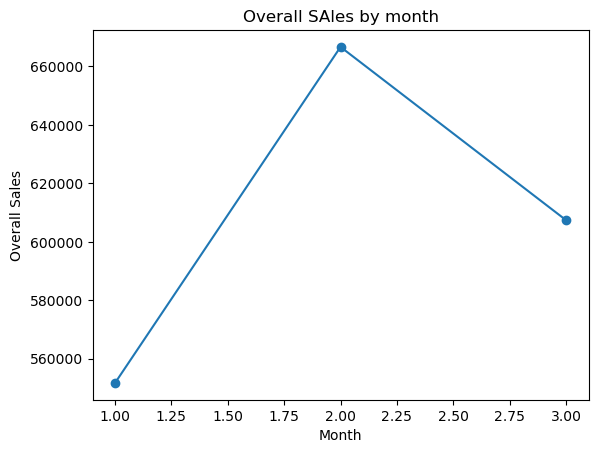

In [83]:
sales_by_month=df.groupby('MONTH')['VALUE'].sum()
sales_by_month.plot(kind='line',marker='o')
plt.xlabel('Month')
plt.ylabel('Overall Sales')
plt.title('Overall SAles by month')
plt.show()

In [ ]:
b. Overall sales by store

Store N8 has the highest revenue in all 3 months, whereas store N7 has the lowest revenue off all 10 stores. When it comes to avareage sales in each store, N3 has the highest average sales

In [85]:
sales_per_store = df.groupby('STORECODE')['VALUE'].sum().reset_index()
sales_per_store.sort_values(by='VALUE',ascending=False,inplace=True)
sales_per_store.head(3)

,STORECODE,VALUE
7,8,273296.65
9,10,250777.03
5,6,237242.00


In [87]:
Average_sales_per_store = df.groupby('STORECODE')['VALUE'].mean().reset_index()
Average_sales_per_store.sort_values(by='VALUE',ascending=False,inplace=True)
Average_sales_per_store.head(3)

,STORECODE,VALUE
2,3,166.748304
9,10,164.336193
8,9,103.302449


C:\Users\HP\AppData\Local\Temp\ipykernel_14324\1327199270.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='STORECODE', y='VALUE', data=sales_per_store, palette="rocket", ax=axes[0, 1])
C:\Users\HP\AppData\Local\Temp\ipykernel_14324\1327199270.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='STORECODE', y='VALUE', data=Average_sales_per_store, palette="rocket", ax=axes[1, 1])


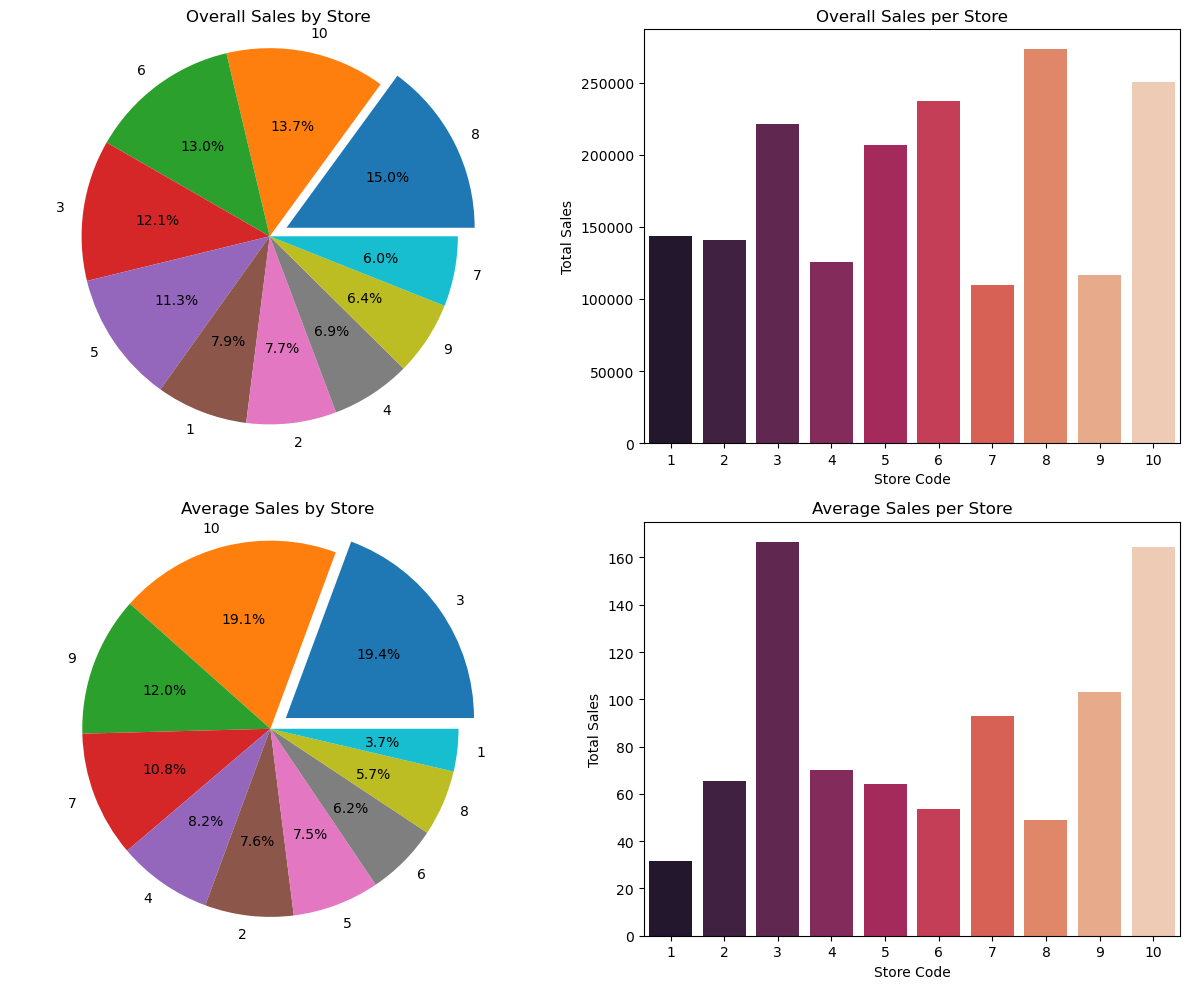

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
# Pie chart
explode = [0.1, 0,0,0,0,0,0,0,0,0]
#The first slice is pulled out by 10% of the radius to draw attention to it.
axes[0, 0].pie(sales_per_store['VALUE'], labels=sales_per_store['STORECODE'],explode=explode, autopct='%1.1f%%')
axes[0, 0].set_title('Overall Sales by Store')
axes[0, 0].axis('equal')
# Bar plot
sns.barplot(x='STORECODE', y='VALUE', data=sales_per_store, palette="rocket", ax=axes[0, 1])
axes[0, 1].set_title('Overall Sales per Store')
axes[0, 1].set_xlabel('Store Code')
axes[0, 1].set_ylabel('Total Sales')
# Pie chart
axes[1, 0].pie(Average_sales_per_store['VALUE'], labels=Average_sales_per_store['STORECODE'],explode=explode, autopct='%1.1f%%')
axes[1, 0].set_title('Average Sales by Store')
axes[1, 0].axis('equal')
# Bar plot
sns.barplot(x='STORECODE', y='VALUE', data=Average_sales_per_store, palette="rocket", ax=axes[1, 1])
axes[1, 1].set_title('Average Sales per Store')
axes[1, 1].set_xlabel('Store Code')
axes[1, 1].set_ylabel('Total Sales')
plt.tight_layout()
plt.show()

***c. Daily sales by store***

In [103]:
sales_month_day = df.groupby(['MONTH', 'DAY'])['VALUE'].sum().reset_index()

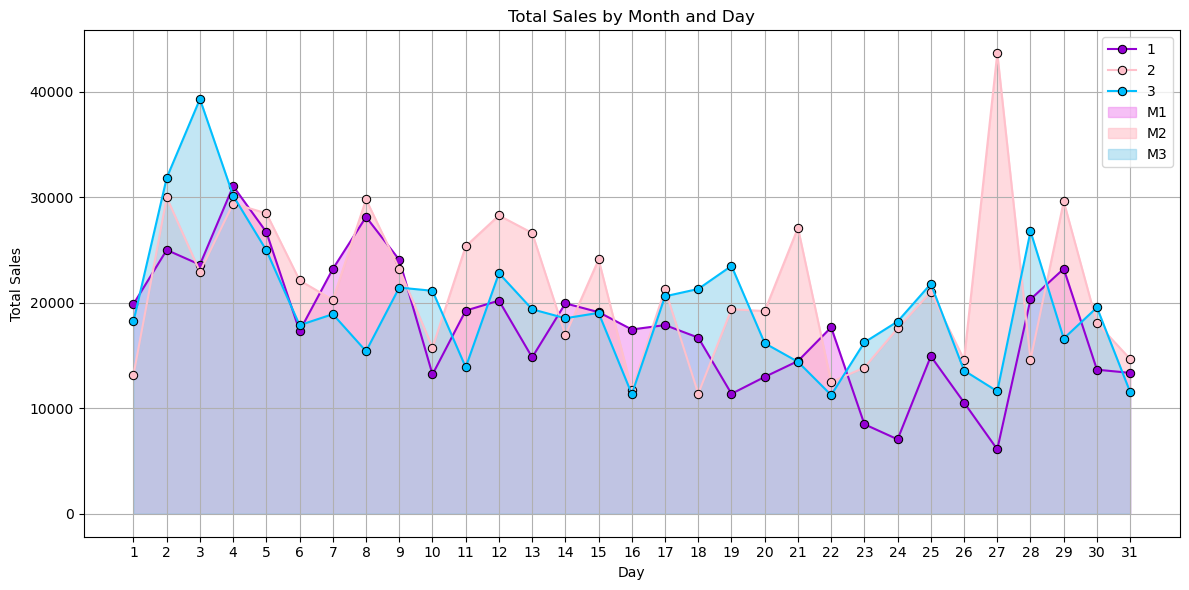

In [121]:
fig, ax = plt.subplots(figsize=(12, 6))
palettes=['darkviolet','pink','deepskyblue']
sns.lineplot(data=sales_month_day, x='DAY', y='VALUE', hue='MONTH', marker='o',markeredgecolor='black',palette=palettes, ax=ax)
ax.set_xlabel('Day')
ax.set_ylabel('Sales')
ax.set_title('Sales by Day, Month-wise')
ax.legend(title='Month')
ax.set_xticks(range(1, max(df['DAY']) + 1)) 

sales_month_day_m1 = sales_month_day[sales_month_day['MONTH'] == 1]
sales_month_day_m2 = sales_month_day[sales_month_day['MONTH'] == 2]
sales_month_day_m3 = sales_month_day[sales_month_day['MONTH'] == 3]
ax.fill_between(sales_month_day_m1['DAY'], sales_month_day_m1['VALUE'], alpha=0.5, label='M1',color="violet")
ax.fill_between(sales_month_day_m2['DAY'], sales_month_day_m2['VALUE'], alpha=0.5, label='M2',color="lightpink")
ax.fill_between(sales_month_day_m3['DAY'], sales_month_day_m3['VALUE'], alpha=0.5, label='M3',color="skyblue")
ax.set_xlabel('Day')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Month and Day')
ax.legend()
ax.grid(True)
plt.tight_layout()
#Adjusts the layout to make sure all elements fit properly
plt.show()

***d. Total number of products sold over 3 months***

In [126]:
total_products_per_store= df.groupby('STORECODE')['QTY'].sum().sort_values(ascending=False).reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_14324\887673153.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x='STORECODE', y='QTY',data=total_products_per_store, palette = "mako")


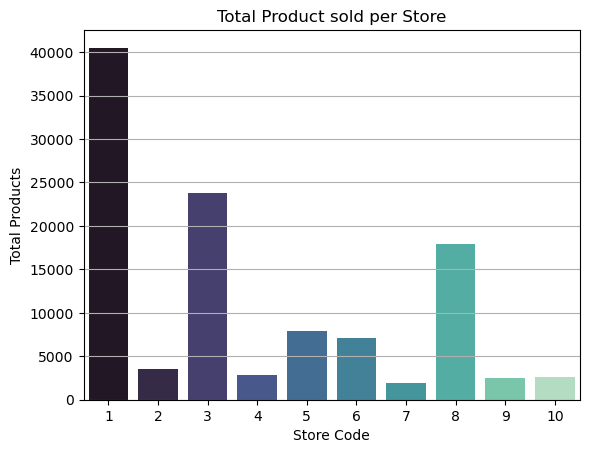

In [132]:
sns.barplot( x='STORECODE', y='QTY',data=total_products_per_store, palette = "mako")
plt.title('Total Product sold per Store')
plt.xlabel('Store Code')
plt.ylabel('Total Products')
plt.grid(axis='y')
plt.show()

In [ ]:
7.Univariate Analysis (Numerical & Categorical)


In [ ]:
8.Correlation Analysis (Numerical & Categorical)